In [12]:
import pandas as pd
import geopandas as gpd
import tempun
import matplotlib.pyplot as plt

In [13]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [37]:
GIST = gpd.read_parquet("../data/large_files/GIST_geocontexts.parquet")
GIST = GIST[GIST["random_dates"].notnull()]
GIST["random_dates"] = GIST["random_dates"].apply(list)
len(GIST)

106898

In [2]:
pottery = pd.read_csv("../data/large_files/Pottery.tsv",  sep='\t')
pottery.head()

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_69592/3440207037.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pottery = pd.read_csv("../data/large_files/Pottery.tsv",  sep='\t')


,URI,Vase Number,Fabric,Technique,Sub Technique,Shape Name,Provenance,Date,Inscriptions,Attributed To,...,Inscriptions II,Measurements,Volume,Weight,Restorations,Ornament,Technical Observations,Pleiades URI,Latitude,Longitude
0,"<a href=""javascript:return(false);"" onclick=""w...",1.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,NaN,CHIUSI P by KUNZE-GOTTE | LEAGROS GROUP by KUN...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<a href=""javascript:return(false);"" onclick=""w...",42.421429,11.702499
1,"<a href=""javascript:return(false);"" onclick=""w...",2.0,ATHENIAN,BLACK-FIGURE,NaN,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"<a href=""javascript:return(false);"" onclick=""w...",3.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<a href=""javascript:return(false);"" onclick=""w...",42.421429,11.702499
3,"<a href=""javascript:return(false);"" onclick=""w...",4.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-550 to -500,NaN,<em>Near</em> MEDEA GROUP by UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"<a href=""javascript:return(false);"" onclick=""w...",5.0,ATHENIAN,BLACK-FIGURE,NaN,"AMPHORA, NECK",NaN,-525 to -475,NaN,ANTIMENEAN by KUNZE-GOTTE | DAYBREAK P by POUI...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def split_date(date_string, n):
    try:
        date_string = date_string.partition(" to ")[n]
    except:
        pass
    try:
        date_string = int(date_string)
    except:
        pass
    return date_string
pottery["not_before"] = pottery["Date"].apply(lambda x: split_date(x, 0))
pottery["not_after"] = pottery["Date"].apply(lambda x: split_date(x, 2))

(-1300, 1.2),
(-1200, 1.2),
(-1100, 0.8),
(-1000, 0.4),



In [26]:
pd.DataFrame(range(-1300, 1900, 100)).to_csv("../data/ober_development-index.csv")

In [28]:
development_index = pd.read_csv("../data/ober_development-index.csv")
development_index

,year,DI
0,-1300,1.2
1,-1200,1.2
2,-1100,0.8
3,-1000,0.4
4,-900,0.6
5,-800,0.9
6,-700,1.7
7,-600,3.3
8,-500,5.2
9,-400,7.5


In [6]:
pottery["random_dates"] = pottery.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=100, antepost=True), axis=1)

[[<matplotlib.patches.Polygon at 0x2a6c23670>],

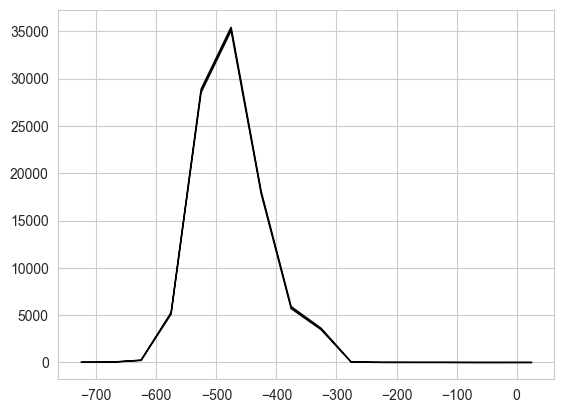

In [9]:
tempun.timeblocksplot_from_randoms(pottery["random_dates"], random_size=100, bins=[-700, -300, 25] )

(-650.0, -250.0)

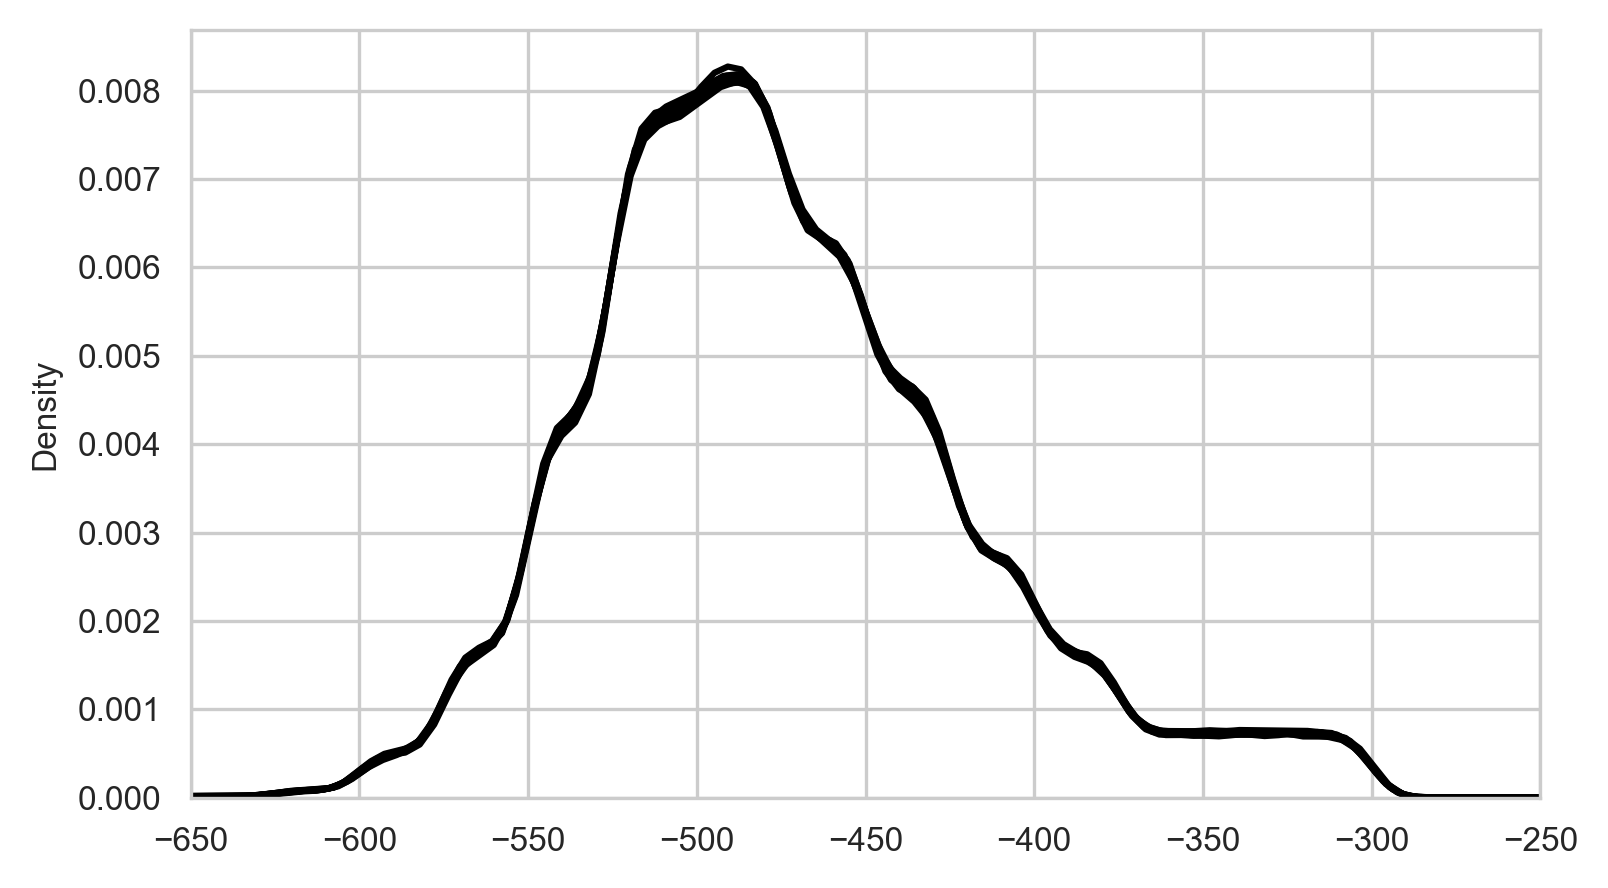

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5.4, 3), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax)
ax.set_xlim(-650,-250)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5.4, 3), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax)
ax.set_xlim(-650,-250)

In [18]:
len(pottery[pottery["Provenance"].str.contains("GREECE", na=False)])

22051

In [ ]:
len(pottery[pottery["Provenance"].str.contains("GREECE", na=False)])

In [21]:
len(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)])

103967

(-650.0, -250.0)

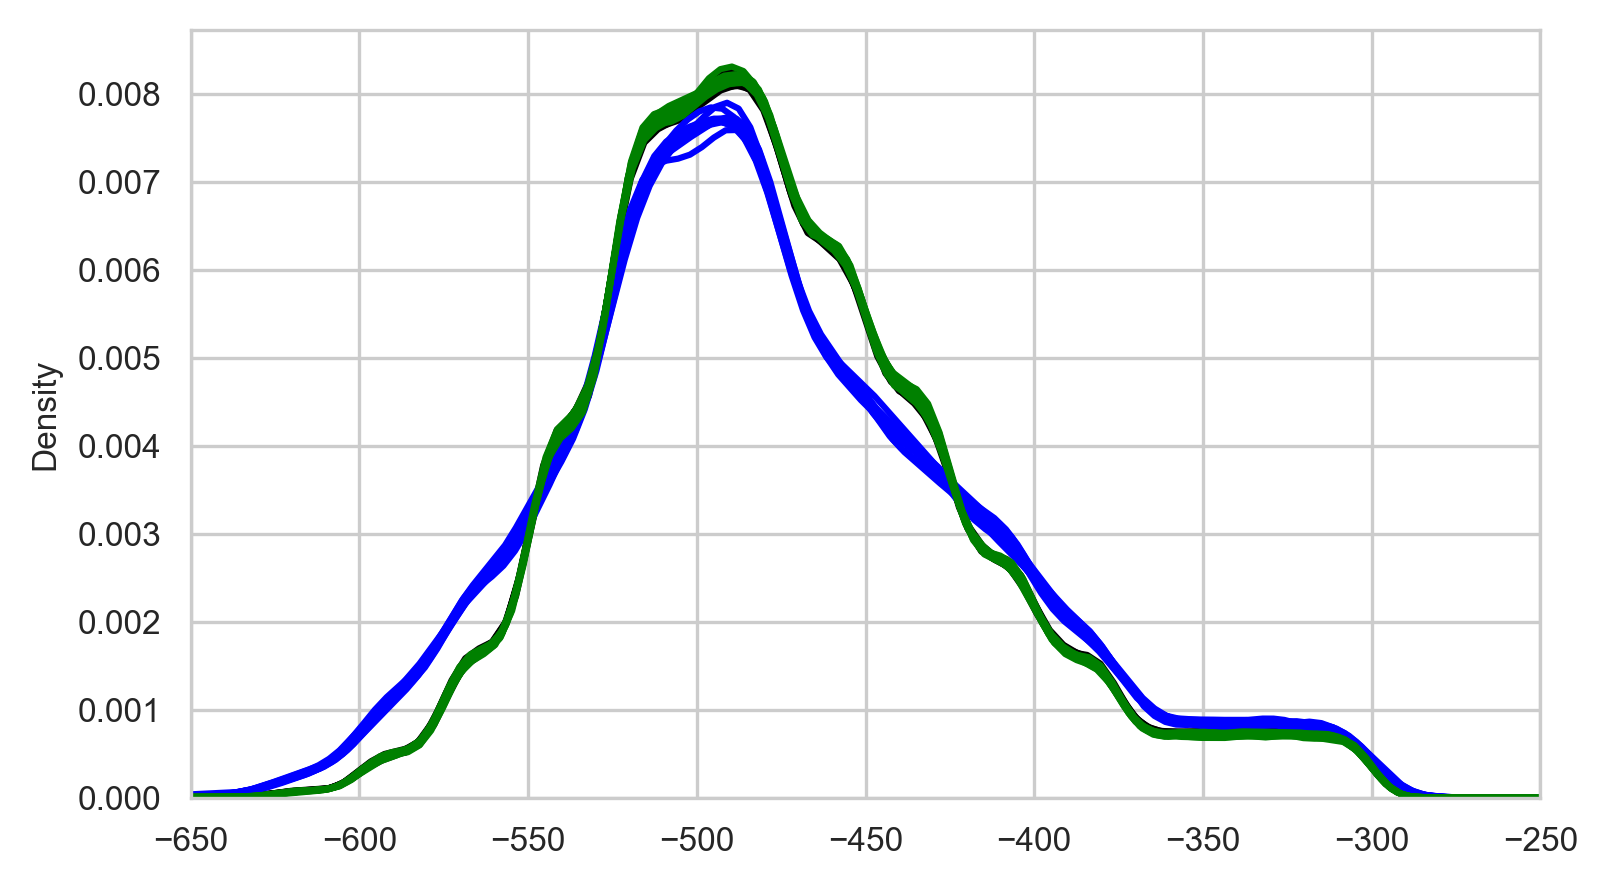

In [32]:
fig, ax = plt.subplots(1,1, figsize=(5.4, 3), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax, color="black")
tempun.kdeplot_from_randoms(pottery[pottery["Provenance"].str.contains("GREECE", na=False)]["random_dates"], random_size=10, ax=ax, color="blue")
tempun.kdeplot_from_randoms(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)]["random_dates"], random_size=10, ax=ax, color="green")
ax.set_xlim(-650,-250)

(-800.0, 600.0)

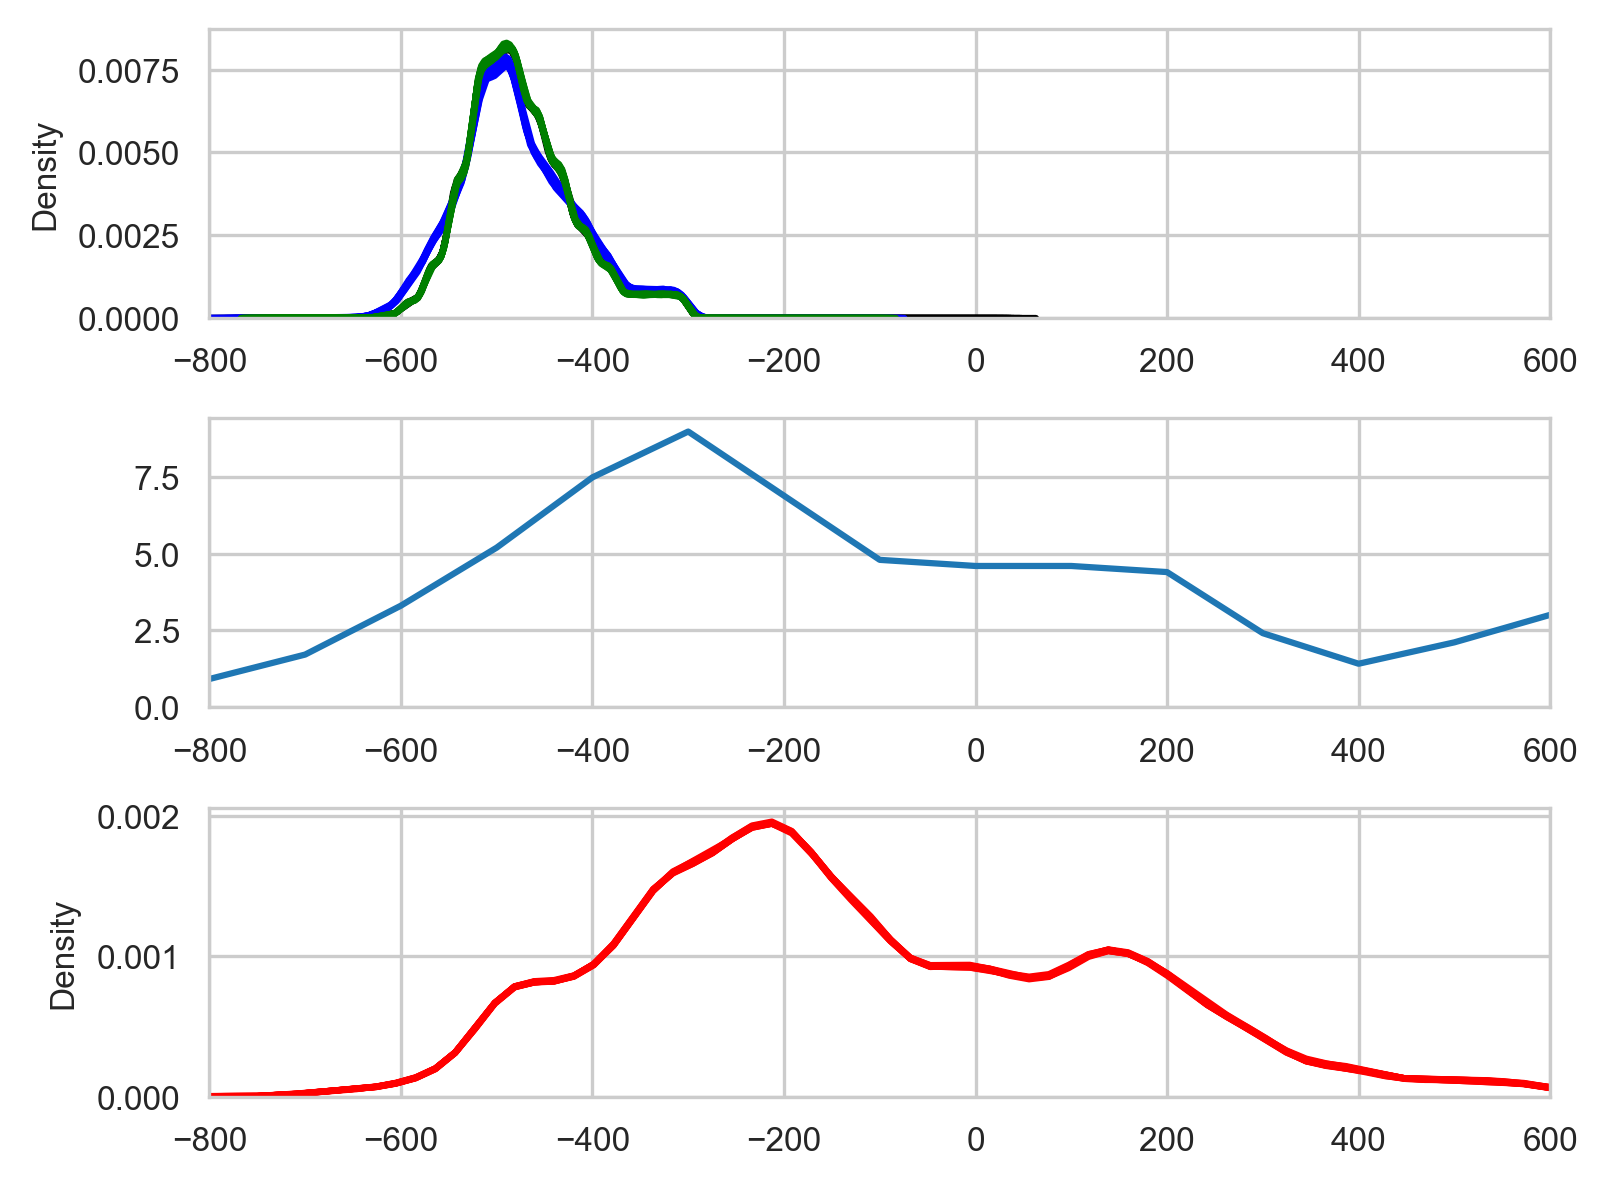

In [52]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(5.4, 4), tight_layout=True)
tempun.kdeplot_from_randoms(pottery["random_dates"], random_size=10, ax=ax1, color="black")
tempun.kdeplot_from_randoms(pottery[pottery["Provenance"].str.contains("GREECE", na=False)]["random_dates"], random_size=10, ax=ax1, color="blue")
tempun.kdeplot_from_randoms(pottery[pottery["Fabric"].str.contains("ATHENIAN", na=False)]["random_dates"], random_size=10, ax=ax1, color="green")
ax1.set_xlim(-800, 600)

ax2.plot(development_index["year"], development_index["DI"])
ax2.set_xlim(-800,600)

#tempun.kdeplot_from_randoms(GIST["random_dates"], random_size=10, ax=ax3, color="green")
tempun.kdeplot_from_randoms(GIST[GIST["greece?"]]["random_dates"], random_size=10, ax=ax3, color="red")
ax3.set_xlim(-800,600)

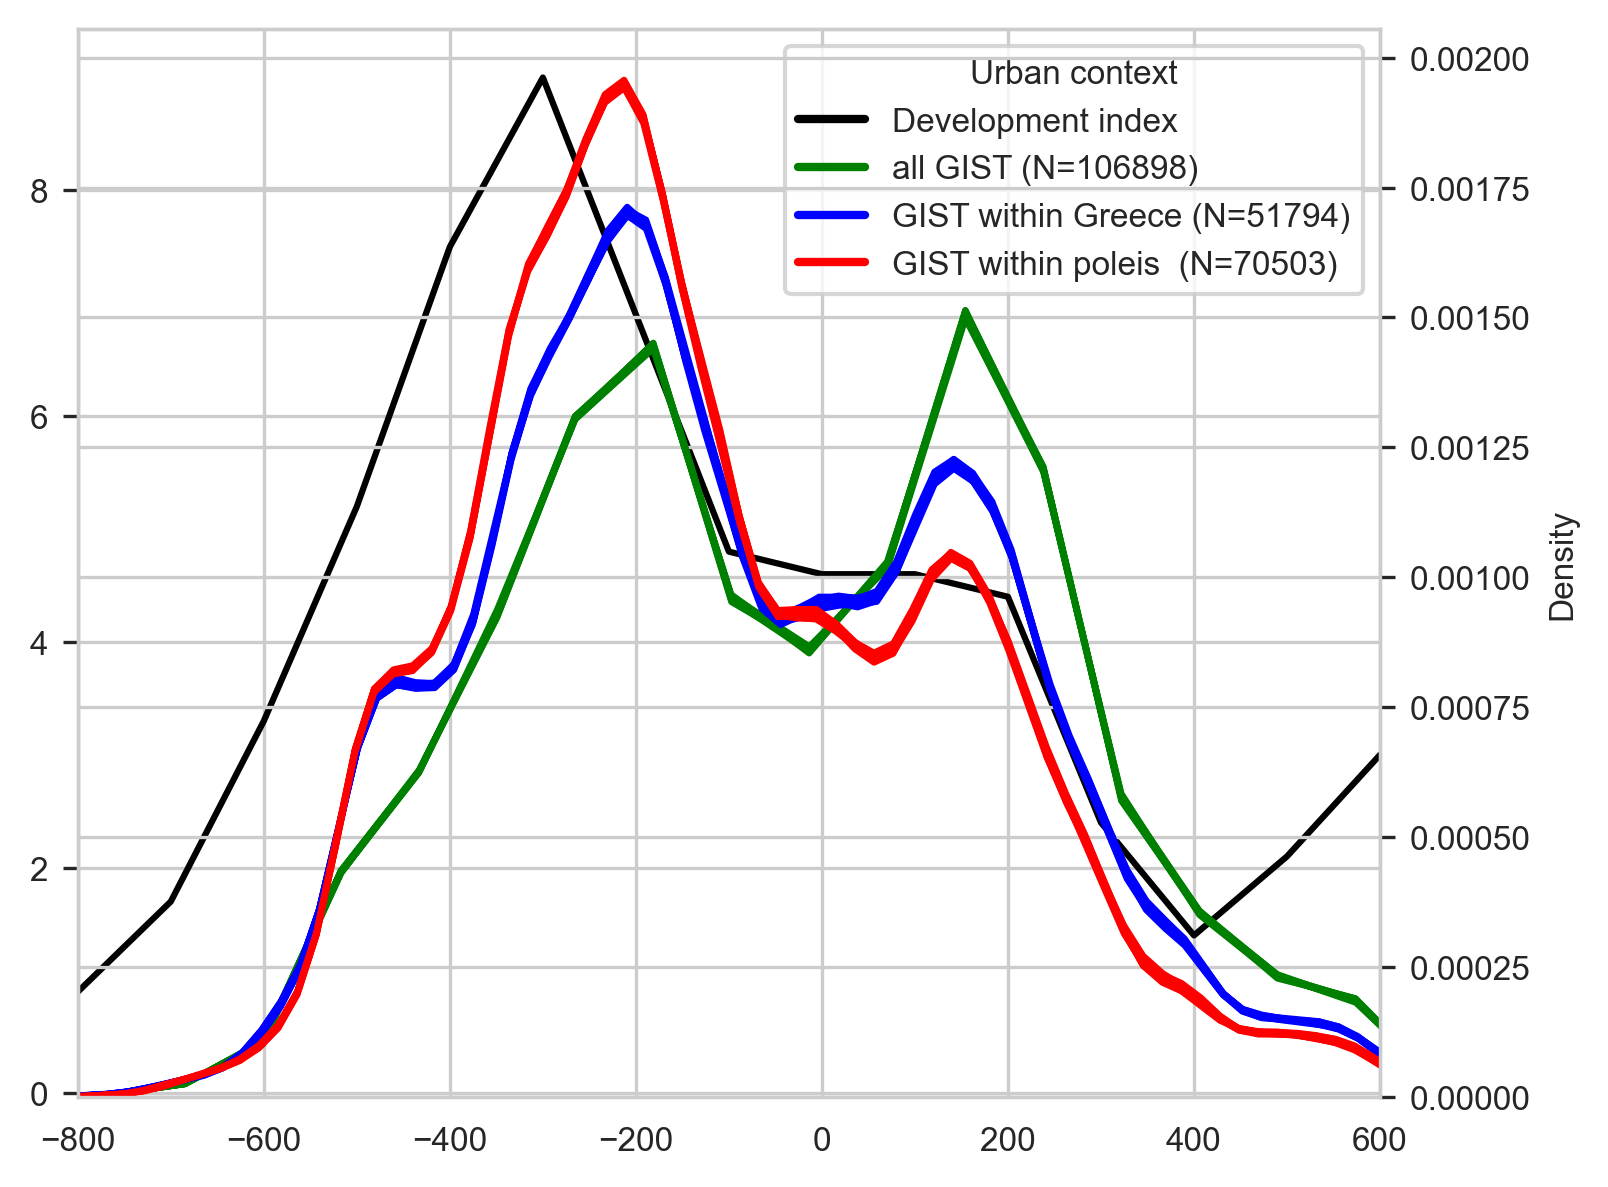

In [63]:

fig, ax1 = plt.subplots(1,1, figsize=(5.4, 4), tight_layout=True)

ax1.plot(development_index["year"], development_index["DI"], color="black")
ax1.set_xlim(-800,600)

ax2=ax1.twinx()
tempun.kdeplot_from_randoms(GIST["random_dates"], random_size=10, ax=ax2, color="green")
tempun.kdeplot_from_randoms(GIST[GIST["polis?"]]["random_dates"], random_size=10, ax=ax2, color="blue")
tempun.kdeplot_from_randoms(GIST[GIST["greece?"]]["random_dates"], random_size=10, ax=ax2, color="red")

ax2.set_xlim(-800,600)

colors=["black", "green", "blue", "red"] #, "darkgrey"]
legend_labels = ["Development index",
                 "all GIST (N={})".format(str(len(GIST))),
                 "GIST within Greece (N={})".format(str(GIST["greece?"].sum())),
                 "GIST within poleis  (N={})".format(str(GIST["polis?"].sum()))
                 ]
markers = [plt.Line2D([0,0],[0,0],color=color, lw=2) for color in colors]
ax1.legend(markers, legend_labels, numpoints=1,  title="Urban context", bbox_to_anchor=(1, 1), loc='upper right')

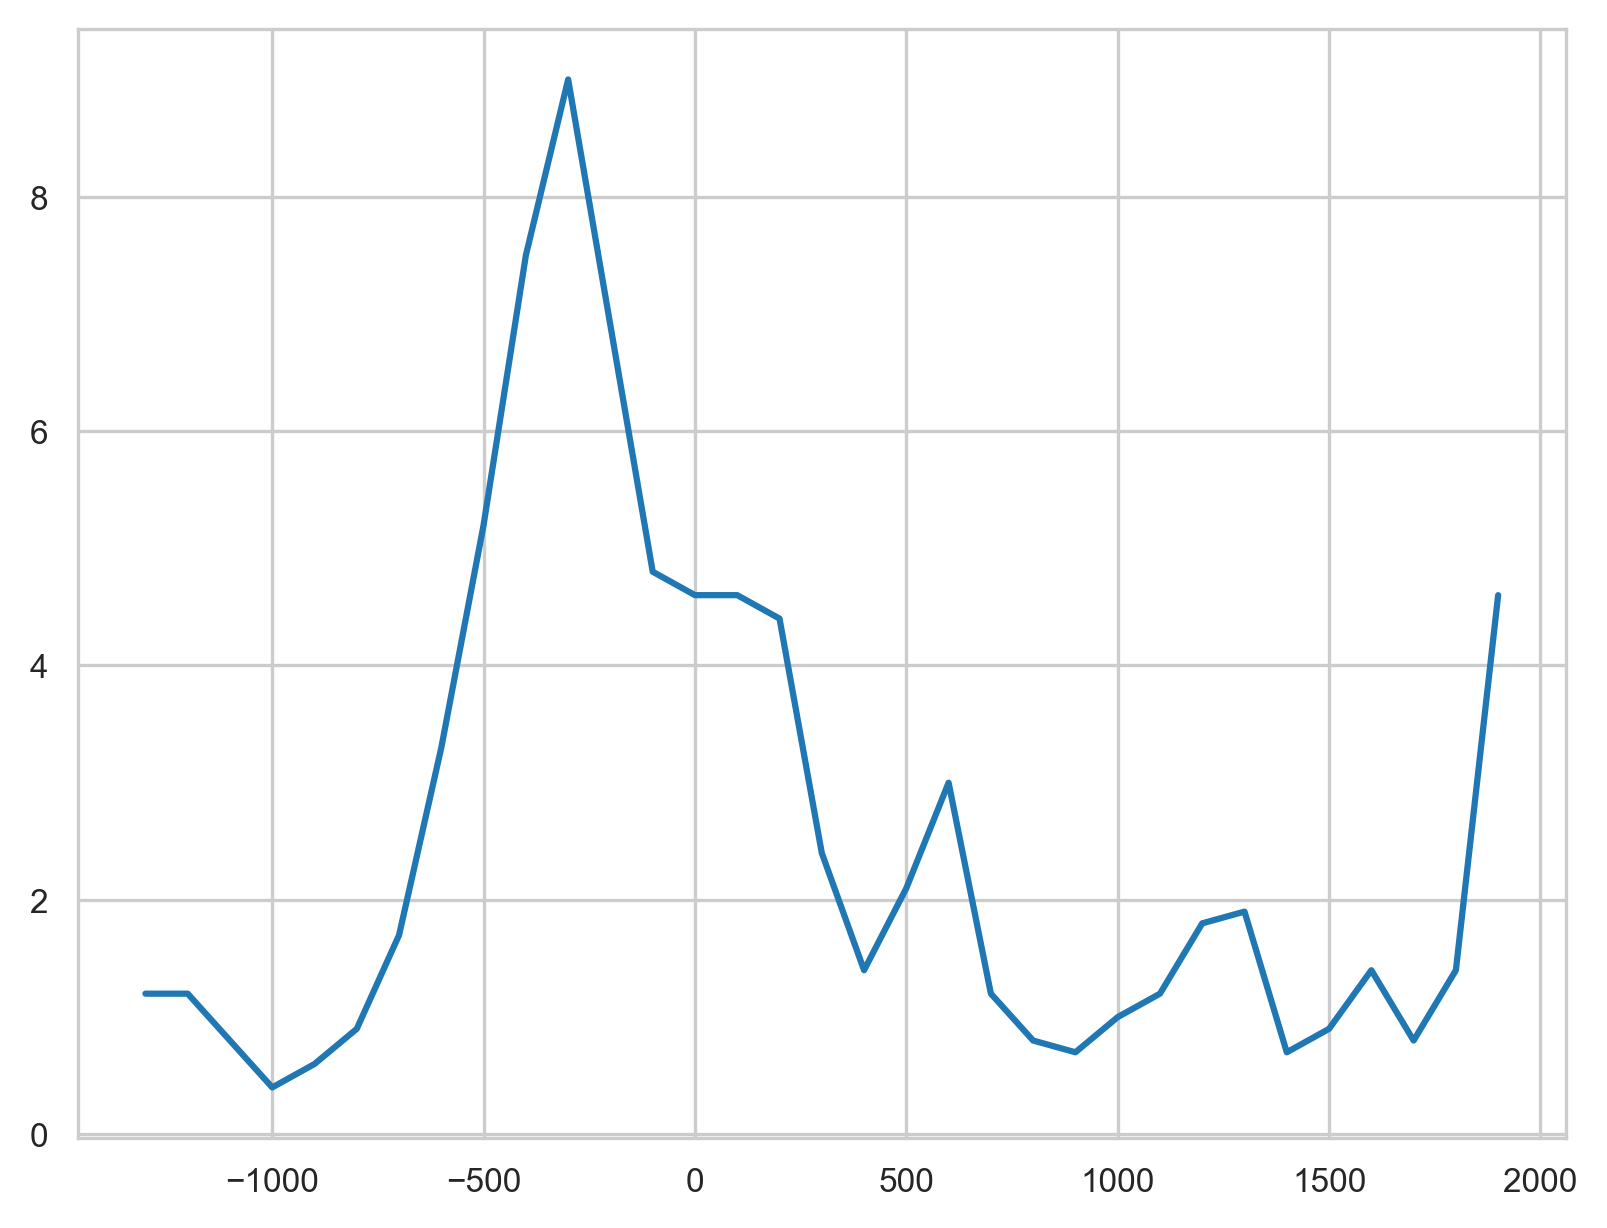

In [31]:
plt.plot(development_index["year"], development_index["DI"])


In [51]:
tempun.timeblocksplot_from_randoms(GIST["random_dates"], random_size=10, ax=ax3, color="red")

[[<matplotlib.patches.Polygon at 0x309492820>],